# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [2]:
from scipy.stats import binom

# Define all the probability functions related to this distribution

def dbinom(x, size, prob = 0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Generates random variables from the binomial distribution
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [3]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


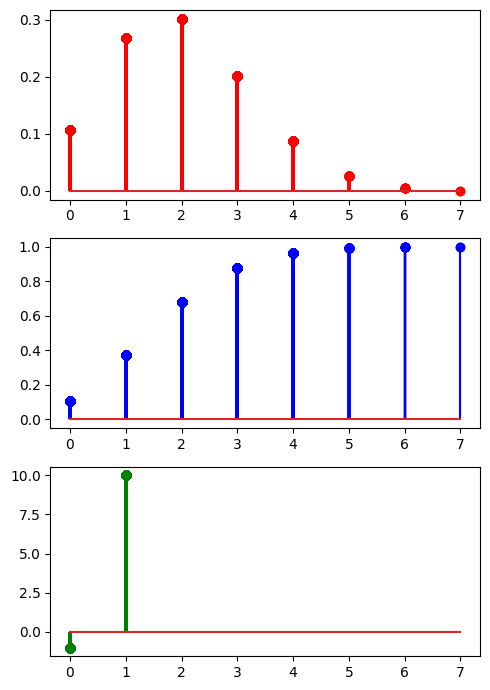

In [4]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

In [5]:
from scipy.stats import norm
from scipy.stats import uniform
import numpy as np
import matplotlib.pyplot as plt

#probability density funcion(PDF) of the normal distribuition
def dnorm(x, mean=0 , sd=1):
    return norm.pdf(x, loc=mean, scale=sd)

#cumulative distribuition function (CDF) of the normal distribuition
def pnorm(q, mean=0, sd=1, lower_tail=True): 
    if lower_tail:
        return norm.cdf(q, loc=mean, scale=sd)
    return 1- norm.cdf(q, loc=mean, scale=sd)

#Quantile function (inverse CDF) of the normal distribuition
def qnorm(p, mean=0, sd=1, lower_tail=True):
    if not lower_tail:
        p = 1-p
    return norm.ppf(p, loc=mean, scale=sd)
    
#Random generation for the normal distribuition
def rnorm(n, mean=0, sd=1):
    return norm.rvs(loc=mean, scale= sd, size =n)





In [6]:
#probability density funcion(PDF) of the uniform distribuition
def dunif(x, min=0 , max=1):
    return uniform.pdf(x, loc=min, scale=max-min)

#cumulative distribuition function (CDF) of the uniform distribuition
def punif(q, min=0, max=1, lower_tail=True): 
    if lower_tail:
        return uniform.cdf(q, loc=min, scale=max-min)
    return 1- uniform.cdf(q, loc=min, scale=max-min)

#Quantile function (inverse CDF) of the uniform distribuition
def qunif(p, min=0, max=1, lower_tail=True):
    if not lower_tail:
        p = 1-p
    return uniform.ppf(p, loc=min, scale=max-min)
    
#Random generation for the uniform distribuition
def runif(n, min=0, max=1):
    return uniform.rvs(loc=min, scale= max-min, size =n)


In [7]:
#Normal distribution examples 
print(f"PDF at x=0: {dnorm(0)}") 
print(f"P(X<0.5): {pnorm(0.5)}")
print(f"65th percentile: {qnorm(0.65)}")
print(f"Random samples: {rnorm(5)}")

#uniform distribution examples 
print(f"PDF at x=0.5: {dunif(0.5)}")
print(f"P(X<0.3): {punif(0.3)}")
print(f"50th percentile: {qunif(0.5)}")
print(f"Random Samples: {runif(5)}")




PDF at x=0: 0.3989422804014327
P(X<0.5): 0.6914624612740131
65th percentile: 0.38532046640756773
Random samples: [-0.87798259 -0.82688035 -0.22647889  0.36736551  0.91358463]
PDF at x=0.5: 1.0
P(X<0.3): 0.3
50th percentile: 0.5
Random Samples: [0.44973984 0.77671056 0.06536616 0.48757119 0.0336136 ]


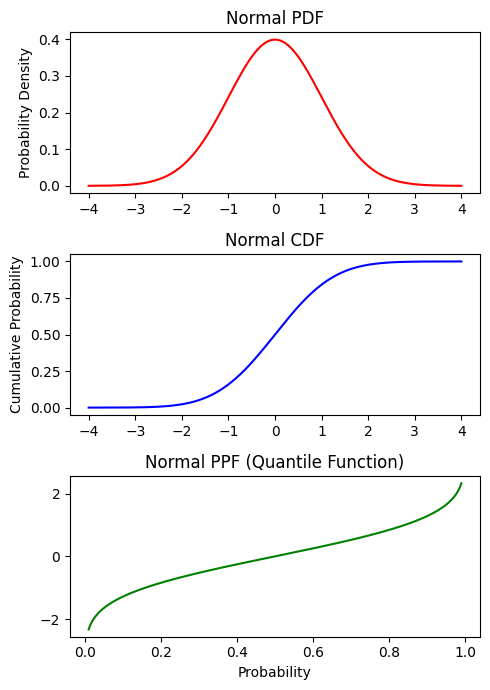

In [15]:
import matplotlib.pyplot as plt

np.random.seed(42)

def plot_normal(mean=0, std=1, n_samples=2000):
    np.random.seed(42)
    data = np.random.normal(mean, std, n_samples)
    x = np.linspace(mean - 4*std, mean + 4*std, 1000)
    pdf = norm.pdf(x, mean, std)
    cdf = norm.cdf(x, mean, std)
    ppf = norm.ppf(np.linspace(0.01, 0.99, 1000), mean, std)

    fig, ax = plt.subplots(3, 1, figsize=(5, 7))

    ax[0].plot(x, pdf, 'r-')
    ax[0].set_title('Normal PDF')
    ax[0].set_ylabel('Probability Density')

    ax[1].plot(x, cdf, 'b-')
    ax[1].set_title('Normal CDF')
    ax[1].set_ylabel('Cumulative Probability')

    ax[2].plot(np.linspace(0.01, 0.99, 1000), ppf, 'g-')
    ax[2].set_title('Normal PPF (Quantile Function)')
    ax[2].set_xlabel('Probability')

    plt.tight_layout()
    plt.show()

# Call the function
plot_normal()

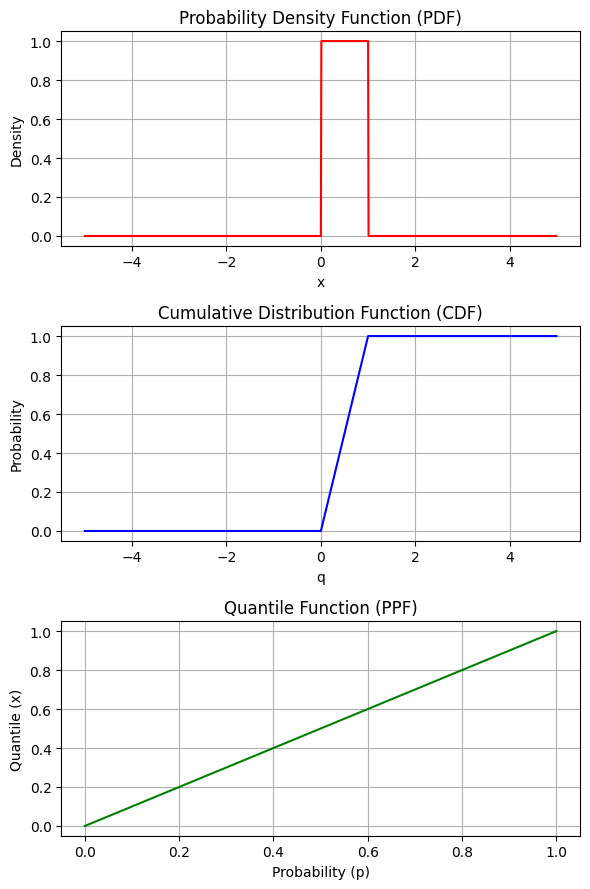

In [17]:
np.random.seed(42)

low = 0
high = 1
data = np.arange(-5, 5, 0.01)

# ---
# Correcting the Quantile Function Plot
# The quantile function (PPF) expects probabilities (values between 0 and 1) as its input.
# Using `data` (which ranges from -5 to 5) directly would result in `NaN` values for the PPF
# where the input is outside the [0, 1] probability range.
# To get a meaningful plot, we need to provide a valid range of probabilities.
# ---

# Use 'min' and 'max' as keyword arguments in the function calls
pmf = dunif(data, min=low, max=high)
cdf = punif(data, min=low, max=high)

# For the PPF, create an array of probabilities from 0 to 1
probabilities_for_ppf = np.linspace(0, 1, len(data))
ppf = qunif(probabilities_for_ppf, min=low, max=high) # Pass probabilities to qunif

fig, axis = plt.subplots(3, 1, figsize=(6, 9))

axis[0].plot(data, pmf, "r-")
axis[0].set_title('Probability Density Function (PDF)')
axis[0].set_ylabel('Density')
axis[0].set_xlabel('x')
axis[0].grid(True)

axis[1].plot(data, cdf, "b-")
axis[1].set_title('Cumulative Distribution Function (CDF)')
axis[1].set_ylabel('Probability')
axis[1].set_xlabel('q')
axis[1].grid(True)

axis[2].plot(probabilities_for_ppf, ppf, "g-") # Plot probabilities on x-axis for PPF
axis[2].set_title('Quantile Function (PPF)')
axis[2].set_ylabel('Quantile (x)')
axis[2].set_xlabel('Probability (p)')
axis[2].grid(True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()